# 전처리 like Field Manual

In [1]:
# 시각화 -> EDA Exploratory Data Analysis (탐색적 데이터 분석) -> 특성공학 feature engineering (변수 추가, 선택...) -> 모델링 -> 평가
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #디폴트 설정

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.describe(include=['O']) #Object 타입에 대한 기술통계를 구해라

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mallet, Master. Andre",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.shape, test.shape
# ((891, 12), (418, 11))
# 891 (훈련) + 418 (테스트) = 1309건 데이터
#2/3 (훈련) + 1/3 (테스트)
#     70%         30%

((891, 12), (418, 11))

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
#features과 생존여부 사이에 어떤 관계가 있는지?

In [13]:
survived=train[train['Survived']==1] #생존자 추출
not_survived=train[train['Survived']==0] #비생존자 추출

In [14]:
#1.
# Survive : 300 (40.0%)
# Not Survived: 591 (60.0%)
# Total : 891
# 이렇게 출력되게 하시오
s=len(survived) #342
n=len(not_survived) #549
total=len(train)
sp=s/total*100
np=n/total*100
print("Survived : %d (%.1f%%)" %(s, sp),"\nNot Survived : %d (%.1f%%)" %(n, np), "\nTotal :", total)

Survived : 342 (38.4%) 
Not Survived : 549 (61.6%) 
Total : 891


In [15]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
#2.등실별 생존여부에 따른 인원수 출력
survived.Pclass.value_counts()
not_survived.Pclass.value_counts()

train.groupby("Pclass")["Survived"].value_counts()
train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


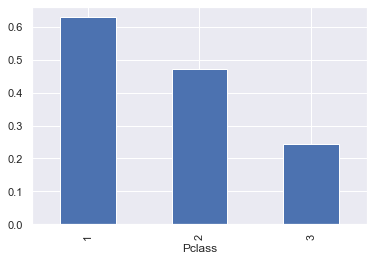

In [18]:
# train.groupby('Pclass').Survived.mean().plot() #선그래프
train.groupby('Pclass').Survived.mean().plot(kind='bar')

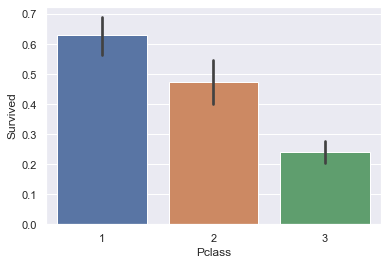

In [19]:
sns.barplot(x='Pclass', y='Survived', data=train)

In [20]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [22]:
train[['Sex', 'Survived']].groupby('Sex').mean() 
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean() 
#여성이 생존률이 훨씬 높구나 라는것을 실시간으로 분석을 해보면서 
# 모델링에 추가할지 항상 고려 (실시간으로)

,Sex,Survived
0,female,0.742038
1,male,0.188908


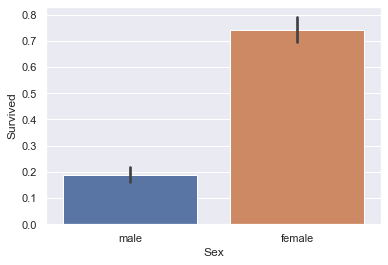

In [23]:
sns.barplot(x='Sex', y='Survived', data=train)

In [24]:
# Pclass & Sex 두 열을 동시에 고려 생존율과의 관계 ex) 1등실: 남/여, 2등실: 남/여, 3등실: 남/여 
# 한눈에 볼 수 있는 crosstab
# 크로스테이블 (교차행렬)
pd.crosstab(train['Pclass'], train['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


/Users/jinwon-kim/Developer/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jinwon-kim/Developer/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


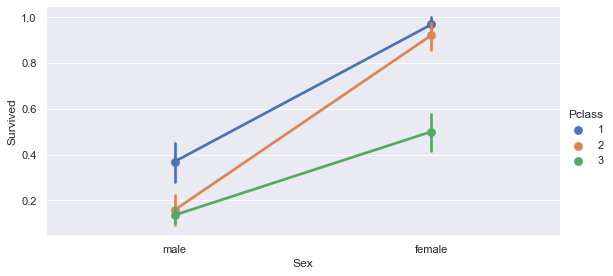

In [25]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

/Users/jinwon-kim/Developer/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


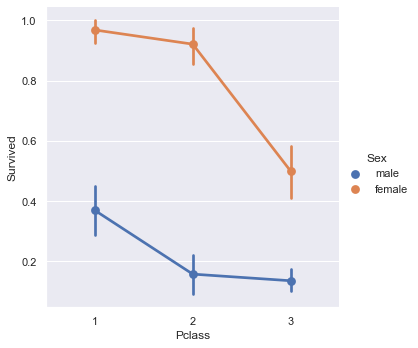

In [26]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)

/Users/jinwon-kim/Developer/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


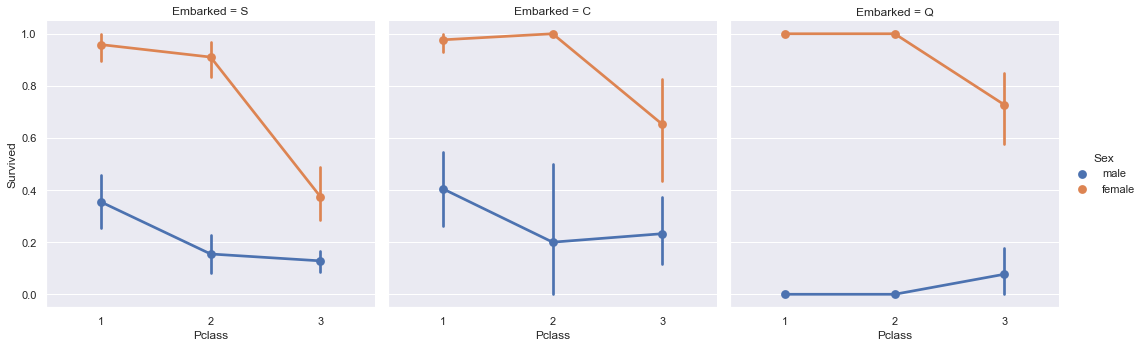

In [27]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=train)
#해석: 
# P class 1과 2는 거의 모든 여성은 생존을 했다


In [28]:
#승선 항구에 따른 생존여부?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
train.groupby('Embarked').Survived.value_counts()
#C 에서 탑승한 대부분의 사람들이 생존률이 높다. 대부분 1등실 탑승 그리고 부유한 곳? 이라는 짐작을 할 수 있다.

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

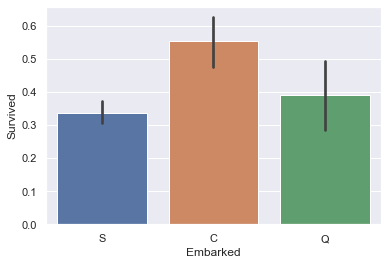

In [30]:
sns.barplot(x='Embarked', y='Survived', data=train)

In [31]:
#Parch 와의 생존여부?
train.Parch.value_counts()
#0은 거의 혼자나 친구와 탑승할 경우, 직계가족

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [32]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [33]:
train[['Parch','Survived']].groupby('Parch', as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


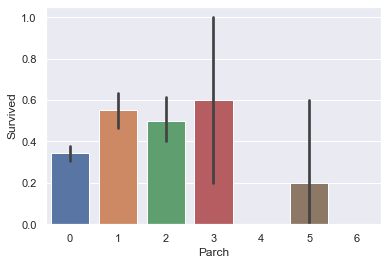

In [34]:
sns.barplot(x='Parch', y='Survived', data=train)
#error bar (오차 막대): 신뢰구간
# 3 번 bar는 신뢰하기가 어렵다;;

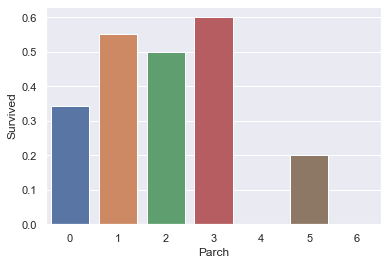

In [35]:
sns.barplot(x='Parch', y='Survived', data=train, ci=None) #error bar removal

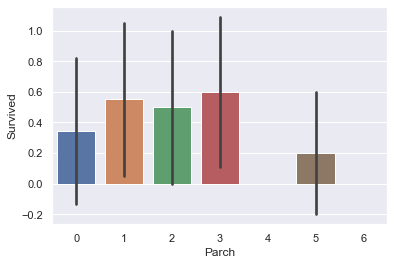

In [36]:
sns.barplot(x='Parch', y='Survived', data=train, ci='sd') #표준편차

In [37]:
#SibSp와의 생존여부?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [38]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [39]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


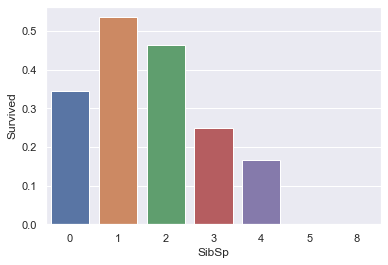

In [40]:
#시각화는 항상 해보아야 한다.
sns.barplot(x='SibSp', y='Survived', data=train, ci=None)

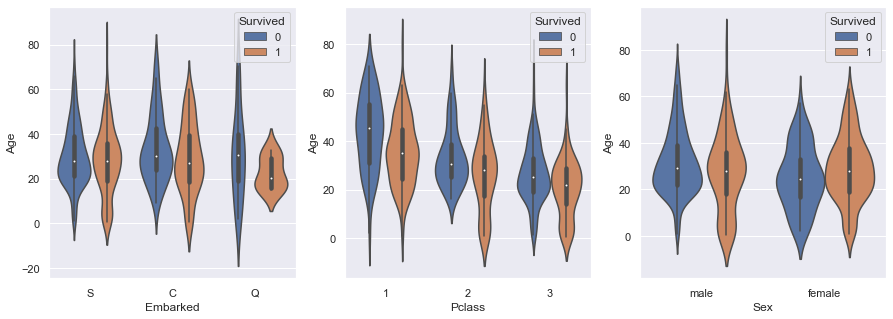

In [41]:
#연속형을 갖는 그래프는 막대그래프로는 보여주기가 힘들다
#바이올린 형태의 그래프를 사용하면 좋다.

#연령별 (y), 항구/Pclass/성별 (x), 생존여부 (범례) -> 바이올린 plot
#외형은 matplot
#내부에 들어가는 그래프는 seaborn
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131) #1줄을 3칸으로 나눈 다음 1번째 위치(칸)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
#연령별 (y), 항구/Pclass/성별 (x), 생존여부 (범례) -> 바이올린 plot
sns.violinplot(x='Embarked', y='Age', hue='Survived', data=train, ax=ax1)
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, ax=ax2)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, ax=ax3)

# 흰색점 : 중앙값 (median)
# 중앙의 두꺼운 선 : 사분위 범위
# 중앙의 얇은 선 : 신뢰구간 (95% 신뢰구간)

# 항구 S에 탑승한 나이는 중앙값이 29정도
# 1등실의 나이를 보면 대부분 성인, 아이가 거의 없다.
# 2등실을 보면 어린아이들이 많이 살아 남은것을 볼 수 있다.

In [42]:
total_survived=train[train['Survived']==1]
total_not_survived=train[train['Survived']==0]
male_survived=train[(train['Survived']==1) & (train['Sex']=='male')]
female_survived=train[(train['Survived']==1) & (train['Sex']=='female')]
male_not_survived=train[(train['Survived']==0) & (train['Sex']=='male')]
female_not_survived=train[(train['Survived']==0) & (train['Sex']=='female')]

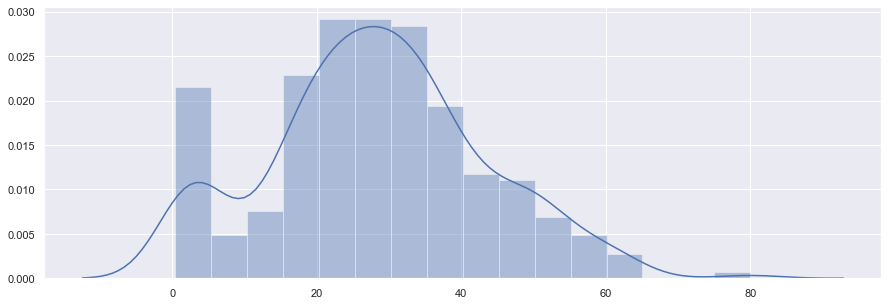

In [43]:
#distplot : 히스토그램, 수치형 데이터의 빈도수를 시각화 (나이에 따른 빈도수)
plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, kde=True) #kde : 밀집도 그래프 False 하면 선이 사라진다.

In [44]:
total_survived['Age'].dropna().values

array([38.  , 26.  , 35.  , 27.  , 14.  ,  4.  , 58.  , 55.  , 34.  ,
       15.  , 28.  , 38.  , 14.  ,  3.  , 19.  , 49.  , 29.  , 21.  ,
        5.  , 38.  , 29.  , 17.  , 32.  ,  0.83, 30.  , 29.  , 17.  ,
       33.  , 23.  , 23.  , 34.  , 21.  , 32.5 , 12.  , 24.  , 29.  ,
       19.  , 22.  , 24.  , 27.  , 22.  , 16.  , 40.  ,  9.  ,  1.  ,
        1.  ,  4.  , 45.  , 32.  , 19.  ,  3.  , 44.  , 58.  , 18.  ,
       26.  , 16.  , 40.  , 35.  , 31.  , 27.  , 32.  , 16.  , 38.  ,
       19.  , 35.  ,  5.  ,  8.  , 24.  , 37.  , 29.  , 30.  , 35.  ,
       50.  ,  3.  , 25.  , 58.  , 35.  , 25.  , 41.  , 63.  , 35.  ,
       19.  , 30.  , 42.  , 22.  , 26.  , 19.  , 50.  ,  0.92, 17.  ,
       30.  , 24.  , 18.  , 26.  , 24.  , 31.  , 40.  , 30.  , 22.  ,
       36.  , 36.  , 31.  , 16.  , 41.  , 45.  ,  2.  , 24.  , 24.  ,
       40.  ,  3.  , 22.  , 60.  , 24.  , 25.  , 22.  , 42.  ,  1.  ,
       35.  , 36.  , 17.  , 36.  , 21.  , 23.  , 24.  , 28.  , 39.  ,
        3.  , 33.  ,

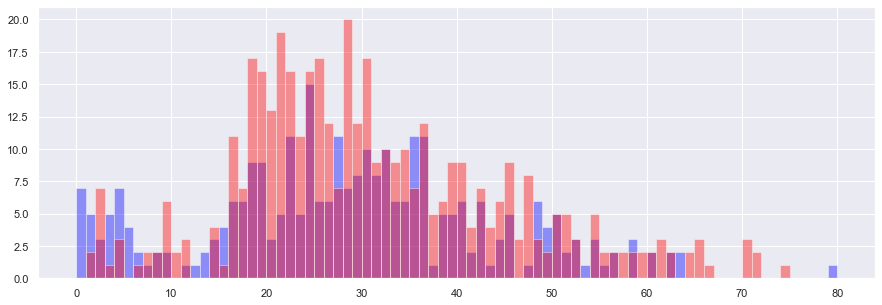

In [45]:
plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, kde=False, bins=range(0, 81, 1), color = 'blue')
sns.distplot(total_not_survived['Age'].dropna().values, kde=False, bins=range(0, 81, 1), color = 'red')
# sns.set_style("white")

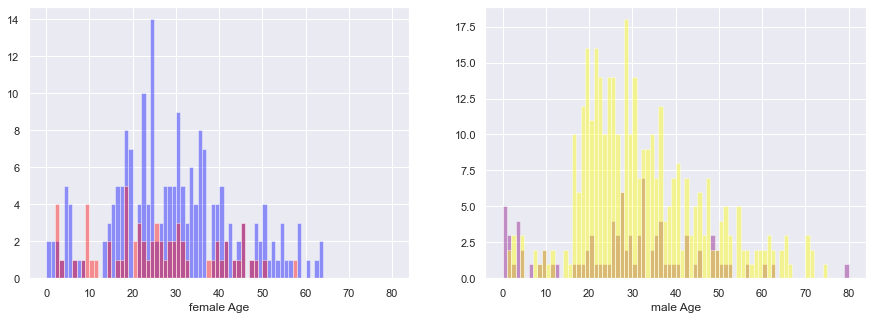

In [46]:
plt.figure(figsize=[15,5])
plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, kde=False, bins=range(0, 81, 1), color = 'blue')
sns.distplot(female_not_survived['Age'].dropna().values, kde=False, bins=range(0, 81, 1), color = 'red', axlabel="female Age")

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, kde=False, bins=range(0, 81, 1), color = 'purple')
sns.distplot(male_not_survived['Age'].dropna().values, kde=False, bins=range(0, 81, 1), color = 'yellow', axlabel="male Age")

#여성이 남성보다 생존률이 훨씬 높았다.

#legend 코드 소스코드 참고!!

In [47]:
train.info() #여기서 Dtype에 수치를 확인
train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [48]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [49]:
# train.drop("PassengerId", axis=1)
train.drop("PassengerId", axis=1).corr() #상관계수 행렬

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


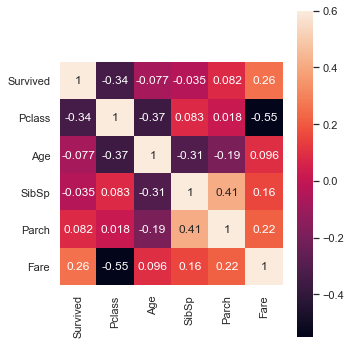

In [50]:
#양/음의 상관관계
plt.figure(figsize=(5,6))
# sns.heatmap(상관계수 행렬)
sns.heatmap(train.drop("PassengerId", axis=1).corr(), square=True, annot=True, vmax=0.6)

In [51]:
# Feature Engineering & category <-> numerical 을 통해서 변수를 추가
# OneHotEncoding
# binarizer 등을 사용

#꿀팁, 신박한 기능
train #891 rows × 12 columns
test #418 rows × 11 columns
train_test_data=[train, test] #리스트 내에 데이터프레임 2개가 요소로 저장

In [52]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [53]:
train.Name.str.extract("([A-Za-z]+\.)") #extract 안에 패턴식을 사용하면 되는데 주의: 그룹은 괄호로 묶어주어야 한다.
# 호칭의 특징 : 공백문자+알파벳+점(.)

,0
0,Mr.
1,Mrs.
2,Miss.
3,Mrs.
4,Mr.
...,...
886,Rev.
887,Miss.
888,Miss.
889,Mr.


In [54]:
for dataset in train_test_data:
    dataset['Title']=dataset.Name.str.extract("([A-Za-z]+)\.")

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [56]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [57]:
# train.groupby(['Title','Sex']).size().unstack().fillna(0)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [58]:
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title']=dataset['Title'].replace('Ms', 'Miss')
    dataset['Title']=dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title']=dataset['Title'].replace('Lady', 'Mrs')
    #여러개를 한꺼번에 바꿔줄때:
    dataset['Title']=dataset['Title'].replace(['Countess','Don', 'Sir', 'Jonkheer',
                                               'Capt','Major','Col','Rev','Dr'], 'Other')

In [59]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,127,0
Other,2,20


In [60]:
train[['Title', 'Survived']].groupby(['Title']).mean()
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.795276
4,Other,0.318182


In [61]:
title_mapping={"Mr":1,
              "Miss":2,
              "Mrs":3,
               "Master":4,
               "Other":5}

In [62]:
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)

In [63]:
train.head()
train['Title'].value_counts()

1    517
2    185
3    127
4     40
5     22
Name: Title, dtype: int64

In [64]:
#female -> 1, male -> 0
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map({'female:':1, 'male':0})


In [65]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          577 non-null    float64
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 90.6+ KB


In [66]:
train.Embarked.unique()
train.Embarked.value_counts() #S 에서 가장많이 탑승해서 모든 NaN은 S로 설정

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [67]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0.0,35.0,0,0,373450,8.0500,NaN,S,1


In [69]:
# 'S':0, 'C':1, 'Q':2 로 변경
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [70]:
train['Age'].isnull().sum()
#Age 열에 대해 결측값 대체
# (age 평균 - age 표준편차)  <= 난수발생(Age 결측값 대체)  <= (age 평균 + age 표준편차)

for dataset in train_test_data:
    
    age_avg=dataset['Age'].mean()
    age_std=dataset['Age'].std()
    age_null_count=dataset['Age'].isnull().sum()
    
    age_null_random_list=np.random.randint(age_avg-age_std, age_avg+age_std, 
                                           size=age_null_count)#범위 설정
    dataset['Age'][np.isnan(dataset['Age'])]=age_null_random_list

#(더 좋은 방법을 고민..) 연습문제

AttributeError: 'float' object has no attribute 'random'

In [ ]:
age_null_random_list

In [ ]:
train['Age'][np.isnan(train['Age'])] #텅 비었다. 위에 for 문으로 Nan 채워줌
train['Age'].isnull().sum()
test['Age'].isnull().sum()
train.info()

In [ ]:
train['AgeBand']=pd.cut(train['Age'], 5)

In [ ]:
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

In [ ]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age']=0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32), 'Age']=1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48), 'Age']=2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64), 'Age']=3
    dataset.loc[dataset['Age']>64, 'Age']=4

In [ ]:
train['Age']

In [ ]:
for dataset in train_test_data:
    dataset['Fare']=dataset['Fare'].fillna(train['Fare'].median())
    #train 과 test의 'Fare' 컬럼 값이 nan인 셀 값을 train의 'Fare' 컬럼값의 중앙값으로 설정
    

In [ ]:
train['FareBand']=pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

pd.cut() : 동일 길이(구간) 로 나누어서 범주로 만듦

pd.qcut() : 동일 데이터 개수로 나누어서 범주로 만듦 

In [ ]:
#아래 구문을 2번 이상 실행하면 Fare열 값이 0~3 범위 내로 
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=7.91, 'Fare']=0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454), 'Fare']=1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31.0), 'Fare']=2
    dataset.loc[dataset['Fare']>31.0, 'Fare']=3
    dataset['Fare']=dataset['Fare'].astype(int)

In [ ]:
train.info()

In [ ]:
for dataset in train_test_data:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1

In [ ]:
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()
#혼자 탔는지 아닌지. isalone열 생성 

In [ ]:
#혼자 여행한 경우에 사망률이 높음을 알 수 있음.
for dataset in train_test_data:
    dataset["IsAlone"]=0 #혼자가 아님
    dataset["FamilySize"]==1
    dataset.loc[dataset['FamilySize']==1, 'IsAlone']=1
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()    

In [ ]:
features_drop=[]

train.drop([]) 여기서는 PassengerId 를 드랍 시키지만 테스트에서는 정답을 제출할때 필요하므로 test에서는 제거하지 않는다.

In [ ]:
train.columns

In [ ]:
train.head()